# Titanic Prediction

## Plan of Attack
- Understand the data, size of the data (column/row), size of missing data, columns to drop
- Data Cleaning
    - data outliers
    - correct the data
    - fillna()
- EDA, look at numarical and object(string) data seperatly, to determine
    - normalization/scale the data
    - determine potential feature engineering approaches
- Feature Engineering according to the findings
- Def function for data preprocessing
- Run Models
- Voting
- Output the result

## Setup the Enviroment

In [1]:
# This block is from https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import seaborn as sns #collection of functions for data visualization
print("seaborn version: {}". format(sns.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.1
matplotlib version: 3.1.3
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.12.0
scikit-learn version: 0.22.1
seaborn version: 0.10.0
-------------------------


In [2]:
#this is from https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
#mpl.style.use('ggplot')
#sns.set_style('white')
#pylab.rcParams['figure.figsize'] = 12,8

In [3]:
#load data
train_raw = pd.read_csv('data/train.csv')
test_raw = pd.read_csv('data/test.csv')

### Understand the data

In [4]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_raw.info()
train_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observation
- This data consist of numaric, string (object), and the Ticket column contains a combination of string and numarical values
- We have a total 12 columns
- Age has some missing data, marjority of Cabin data are missing, two missing values in Embarked
- judging from std, min and max, we can conclude that data in PassengerId are pretty evenly distributed

#### Plan of action
- Split the data by dtype (string vs numeric) for targeted actions
- Need to handle missing data in Age, Cabin (drop, due to the large amount), and Embarked
- Consider dropping PassengerId due to the lack of trend in the data


### Data Cleaning

In [6]:
#let split the data for more targeted handling
txt_cols = [cname for cname in train_raw.columns if train_raw[cname].dtype == "object"]

# Select numerical columns
num_cols = [cname for cname in train_raw.columns if train_raw[cname].dtype in ['int64', 'float64']]

txt_data = train_raw[txt_cols].copy()
num_data = train_raw[num_cols].copy()

In [7]:
# to make sure we didn't accidentally drop any cols
txt_data.shape[1] + num_data.shape[1] == train_raw.shape[1]

True

In [8]:
#now let us look at the numaric cols
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [9]:
age_missing_per = num_data.Age.isnull().sum()/len(num_data.Age)
print("{:.2%}".format(age_missing_per))

19.87%


We have close to 20% of Age data that are missing from the dataset, let's think of a cleverer way to fill in the gaps
- the idea is to find corrolating features with Age, create a lookup table to impute missing Age values

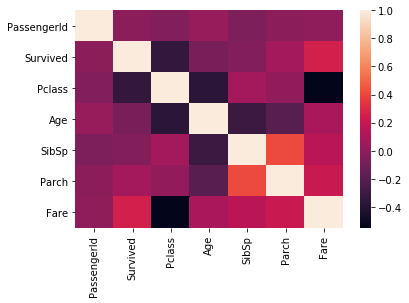

In [10]:
# to find corrolating features
sns.heatmap(train_raw.corr())

In [11]:
#we see that Pclass, Sibsp, Parch are highly corrolated with Age
Pclass_Sibsp_Parch = train_raw['Pclass'].apply(str)+train_raw['SibSp'].apply(str)+train_raw['Parch'].apply(str)
Pclass_Sibsp_Parch.value_counts()

300    324
100    109
200    104
110     51
310     46
210     26
311     25
211     20
101     19
302     12
111     12
301     11
320     10
341      9
342      9
102      9
201      8
202      8
212      8
112      7
331      7
382      7
352      5
332      4
221      4
312      4
132      3
321      3
315      3
120      3
220      3
322      2
314      2
305      2
313      2
122      2
330      1
303      1
213      1
114      1
316      1
230      1
223      1
304      1
dtype: int64

300, 100, 200 have the most values, let's create a look up table with 4 classes, 300, 100, 200 and others respectively 

In [12]:
frame = { 'Pclass_Sibsp_Parch': Pclass_Sibsp_Parch, 'Age': train_raw.Age } 
age_lookup = pd.DataFrame(frame)
age_lookup

,Pclass_Sibsp_Parch,Age
0,310,22.0
1,110,38.0
2,300,26.0
3,110,35.0
4,300,35.0
...,...,...
886,200,27.0
887,100,19.0
888,312,NaN
889,100,26.0


In [13]:
age_classes = ['300', '100', '200']
age_lookup['Pclass_Sibsp_Parch'] = age_lookup['Pclass_Sibsp_Parch'].apply(lambda x: x if x in age_classes else 'other')
age_lookup['Pclass_Sibsp_Parch'].value_counts()

other    354
300      324
100      109
200      104
Name: Pclass_Sibsp_Parch, dtype: int64

In [56]:
age_lookup_grouped = age_lookup.groupby("Pclass_Sibsp_Parch", as_index=False).mean()

In [57]:
age_lookup_grouped['Age'][age_lookup_grouped.Pclass_Sibsp_Parch == '100'][0]

41.00581395348837

In [83]:
age_lookup_grouped

,Age,Age_mean
Pclass_Sibsp_Parch,,
100,41.005814,NaN
200,33.736559,NaN
300,28.235556,NaN
other,26.413452,NaN


In [98]:
age_lookup_grouped.loc['100']['Age']

41.00581395348837

In [104]:
def lookup_mean(comb):
    match = comb
    val = age_lookup_grouped['Age'][match]
    return val

In [105]:
age_lookup['Age_mean'] = age_lookup['Pclass_Sibsp_Parch']

In [108]:
age_lookup['Age_mean'] = age_lookup['Age_mean'].apply(lookup_mean)

In [111]:
age_lookup['Age'] = age_lookup['Age'].fillna(age_lookup['Age_mean'])

In [113]:
age_lookup['Age'].isnull().sum()

0

In [81]:
num_data['Pclass_Sibsp_Parch'] = num_data['Pclass'].apply(str)+num_data['SibSp'].apply(str)+num_data['Parch'].apply(str)
num_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_Sibsp_Parch
0,1,0,3,22.0,1,0,7.2500,310
1,2,1,1,38.0,1,0,71.2833,110
2,3,1,3,26.0,0,0,7.9250,300
3,4,1,1,35.0,1,0,53.1000,110
4,5,0,3,35.0,0,0,8.0500,300
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,200
887,888,1,1,19.0,0,0,30.0000,100
888,889,0,3,NaN,1,2,23.4500,312
889,890,1,1,26.0,0,0,30.0000,100


In [132]:
Pclass_Sibsp_Parch_num = ['100', '200', '300']
num_data['Pclass_Sibsp_Parch'] = num_data['Pclass_Sibsp_Parch'].apply(lambda x: x if x in Pclass_Sibsp_Parch_num else 'other' )

In [133]:
num_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_Sibsp_Parch
0,1,0,3,22.0,1,0,7.2500,other
1,2,1,1,38.0,1,0,71.2833,other
2,3,1,3,26.0,0,0,7.9250,300
3,4,1,1,35.0,1,0,53.1000,other
4,5,0,3,35.0,0,0,8.0500,300
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,200
887,888,1,1,19.0,0,0,30.0000,100
888,889,0,3,NaN,1,2,23.4500,other
889,890,1,1,26.0,0,0,30.0000,100


In [161]:
nulls = num_data.loc[num_data['Age'].isnull(),['Age','Pclass_Sibsp_Parch']]


In [176]:
age_lookup_grouped_redin = age_lookup_grouped.set_index('Pclass_Sibsp_Parch')
age_lookup_grouped_redin['Age']['100']

41.00581395348837

In [ ]:
nulls_fill = nulls.Age.apply(lambda x: )

In [165]:
age_lookup_grouped

,Pclass_Sibsp_Parch,Age
0,100,41.005814
1,200,33.736559
2,300,28.235556
3,other,26.413452


In [97]:
age_lookup_grouped.loc[age_lookup_grouped['Pclass_Sibsp_Parch'] == '100']['Age'][0]

41.00581395348837

In [60]:
age_impute.loc[age_impute['Age_Type']== '300']. mean()

Age_Type          inf
Age         28.235556
dtype: float64